![tensorflow](tensorflow_image.png)

## RNA 데이터를 활용한 암종류 예측(TensorFlow 활용)
[데이터는 어디에 있나?] (https://github.com/biospin/BigBio)

[Code Reference] (https://www.tensorflow.org/versions/r0.8/tutorials/mnist/beginners/index.html#softmax-regressions)

## 1. 데이터 준비 및 탐색

### 필요 모듈 불러오기

In [1]:
get_ipython().magic(u'matplotlib inline')
import os
import numpy as np
import gzip, cPickle
from glob import glob
import matplotlib.pyplot as plt 
import tensorflow as tf

### 작업폴더 지정
***:각자 자신이 데이터를 내려받은 폴더로 지정***

In [2]:
os.chdir('/Users/joikyeon/Documents/BigBio/mRNA')
os.getcwd()

'/Users/joikyeon/Documents/BigBio/mRNA'

### train, validation, test  구분하여 불어오기

In [4]:
# 데이터 불러오는 함수
def dir_to_dataset(glob_files):
    for file_count, file_name in enumerate(sorted(glob(glob_files))):
        print(file_name)
        pklPartial=gzip.open(file_name)
        pklT= cPickle.load(pklPartial)
        if file_count==0:
            dataSet0=pklT[0]
            dataSet1=pklT[1]
        else:
            dataSet0 = np.concatenate((dataSet0,pklT[0]))
            dataSet1 = np.append(dataSet1,pklT[1])
        pklPartial.close()
        print len(dataSet0), len(dataSet1) 

    dataSet1=dataSet1-1
    #print np.amax(dataSet1)
    dataSet= (dataSet0, dataSet1)
    return dataSet

# train, validattion, test set 지정
TrainSet = dir_to_dataset('*type1*')
ValidationSet = dir_to_dataset('*type2*')
TestSet = dir_to_dataset('*type3*')

mrna_20160125-200855_type1_00.pkl.gz
500 500
mrna_20160125-200855_type1_01.pkl.gz
1000 1000
mrna_20160125-200855_type1_02.pkl.gz
1500 1500
mrna_20160125-200855_type1_03.pkl.gz
2000 2000
mrna_20160125-200855_type1_04.pkl.gz
2500 2500
mrna_20160125-200855_type1_05.pkl.gz
3000 3000
mrna_20160125-200855_type1_06.pkl.gz
3500 3500
mrna_20160125-200855_type1_07.pkl.gz
4000 4000
mrna_20160125-200855_type1_08.pkl.gz
4500 4500
mrna_20160125-200855_type1_09.pkl.gz
5000 5000
mrna_20160125-200855_type1_10.pkl.gz
5500 5500
mrna_20160125-200855_type1_11.pkl.gz
6000 6000
mrna_20160125-200855_type1_12.pkl.gz
6500 6500
mrna_20160125-200855_type1_13.pkl.gz
7000 7000
mrna_20160125-200855_type1_14.pkl.gz
7500 7500
mrna_20160125-200855_type1_15.pkl.gz
7945 7945
mrna_20160125-200855_type2_00.pkl.gz
500 500
mrna_20160125-200855_type2_01.pkl.gz
1000 1000
mrna_20160125-200855_type2_02.pkl.gz
1500 1500
mrna_20160125-200855_type2_03.pkl.gz
1679 1679
mrna_20160125-200855_type3_00.pkl.gz
500 500
mrna_20160125-20085

In [5]:
# 각각의 데이터셋에서 feature와 label을 구분
train_x, train_y = TrainSet
validation_x, validation_y = ValidationSet
test_x, test_y= TestSet

# 각각의 size 출력
print train_x.shape ; print train_y.shape
print validation_x.shape ; print validation_y.shape
print test_x.shape ; test_y.shape

(7945, 20502)
(7945,)
(1679, 20502)
(1679,)
(1679, 20502)


(1679,)

type of cancer: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


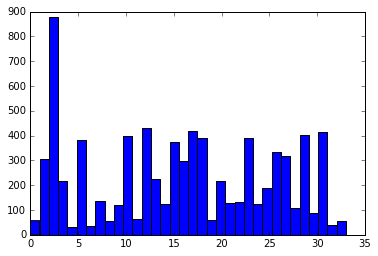

In [6]:
print "type of cancer:", np.unique(train_y)
plt.hist(train_y, bins=34)
plt.show()

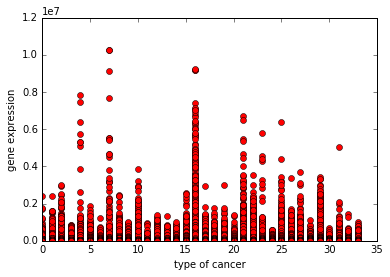

In [7]:
plt.plot(train_y, train_x, 'ro')
plt.xlabel('type of cancer')
plt.ylabel('gene expression')
plt.show()

## 2. 모형의 Trainning 및 평가

In [21]:
# label 변수의 one-hot encoding
import pandas as pd
print(pd.get_dummies(train_y).values)
train_y_onehot=pd.get_dummies(train_y).values
print train_y_onehot.shape

print(pd.get_dummies(test_y).values)
test_y_onehot=pd.get_dummies(test_y).values
print test_y_onehot.shape

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
(7945, 34)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(1679, 34)


In [22]:
n_input = 20502 # feature의 개수(gene expression)
n_classes = 34 # label의 개수(암의 종류(0-33))

In [23]:
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.zeros([n_input, n_classes]))
bias = tf.Variable(tf.zeros([n_classes]))

pred = tf.nn.softmax(tf.matmul(x, W) + bias)

In [24]:
# 비용함수 정의
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))

In [25]:
# 학습률(learning rate) 정의
learning_rate= 0.01

# optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [26]:
# 모든 변수 초기화
init = tf.initialize_all_variables()

# Session 시작
# 모델 훈련
# test set로 모델 평가 : 정확도(accuracy) 측정
with tf.Session() as sess:
    sess.run(init)

    for step in xrange(2001):
        sess.run(optimizer, feed_dict={x:train_x, y:train_y_onehot})
        if step%200==0:
            print step, sess.run(cross_entropy, feed_dict={x:train_x, y:train_y_onehot}), sess.run(W), sess.run(bias)
    
    print "                 "
    print "optimization 완료!"
    print "                 "
    print "모형의 평가 결과는?...."

    # 모형의 Test
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # accuracy 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "정확도(Accuracy) :", accuracy.eval({x: test_x, y: test_y_onehot})

0 nan [[-0.5935117  -0.57999563 -0.40378478 ..., -0.5389393  -0.58784771
  -0.58135074]
 [-0.02930013 -0.02757335 -0.02911463 ..., -0.02784253 -0.02875605
  -0.0293349 ]
 [-0.01083525 -0.01043608 -0.00680359 ..., -0.01117096 -0.01009282
  -0.01188453]
 ..., 
 [-0.19160722  0.03038529  0.9001528  ...,  0.12480954 -0.19051275
  -0.17324646]
 [-0.03650369 -0.03090464  0.18034832 ..., -0.01828097 -0.04540142
  -0.0294549 ]
 [-0.00102948 -0.00120999 -0.00098818 ..., -0.0011492  -0.00124483
  -0.00126091]] [ -2.22358140e-04   8.97673599e-05   8.10935919e-04  -2.09909213e-05
  -2.52559053e-04   1.87948623e-04  -2.51301739e-04  -1.20429431e-04
  -2.26132790e-04  -1.40567747e-04   2.06840850e-04  -2.12289815e-04
   2.47123215e-04  -8.40373923e-06  -1.39308788e-04   1.76619578e-04
   8.09560879e-05   2.34534178e-04   1.95503992e-04  -2.17327412e-04
  -2.09904938e-05  -1.31757333e-04  -1.29239255e-04   1.99280359e-04
  -1.36791685e-04  -5.87526883e-05   1.25008315e-04   1.03612867e-04
  -1.556716

## 모형 성능의 향상을 위해 전진!!!

## 3. 데이터 정규화 후 다시 모형 trainning 및 평가

- 0과 1사이 값으로 정규화
- [참고] (http://scikit-learn.org/stable/modules/preprocessing.html)


In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_x_normalized = min_max_scaler.fit_transform(train_x)

In [28]:
train_x_normalized.shape

(7945, 20502)

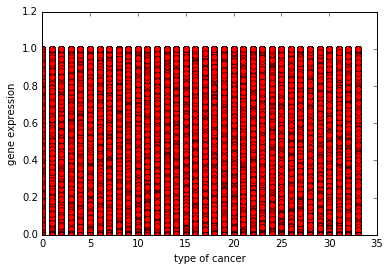

In [32]:
# normalize가 잘 되었는 지 그림으로 확인
plt.plot(train_y, train_x_normalized, 'ro')
plt.xlabel('type of cancer')
plt.ylabel('gene expression')
plt.show()

In [29]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)

    for step in xrange(2001):
        sess.run(optimizer, feed_dict={x:train_x_normalized, y:train_y_onehot})
        if step%200==0:
            print step, sess.run(cross_entropy, feed_dict={x:train_x_normalized, y:train_y_onehot}), sess.run(W), sess.run(bias)
    
    print "                 "
    print "optimization 완료!"
    print "                 "
    print "모형의 평가 결과는?...."

    # 모형의 Test
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # accuracy 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "정확도(Accuracy) :", accuracy.eval({x: test_x, y: test_y_onehot})

0 3.49663 [[ -1.88164768e-06  -1.83879717e-06  -1.28014460e-06 ...,  -1.70863348e-06
   -1.86369061e-06  -1.84309317e-06]
 [ -6.62133652e-06  -6.23111328e-06  -6.57941791e-06 ...,  -6.29194255e-06
   -6.49838557e-06  -6.62919365e-06]
 [ -1.99239116e-06  -1.91899221e-06  -1.25104748e-06 ...,  -2.05412289e-06
   -1.85587203e-06  -2.18533364e-06]
 ..., 
 [ -2.20010006e-05   3.09466486e-06   1.05049257e-04 ...,   1.37370889e-05
   -2.17204670e-05  -1.97295121e-05]
 [ -2.96106236e-06  -2.50688549e-06   1.46292787e-05 ...,  -1.48289394e-06
   -3.68281849e-06  -2.38928737e-06]
 [ -1.23622522e-06  -1.45297906e-06  -1.18663570e-06 ...,  -1.37999029e-06
   -1.49481605e-06  -1.51412939e-06]] [ -2.22358140e-04   8.97673599e-05   8.10935919e-04  -2.09909213e-05
  -2.52559053e-04   1.87948623e-04  -2.51301739e-04  -1.20429431e-04
  -2.26132790e-04  -1.40567747e-04   2.06840850e-04  -2.12289815e-04
   2.47123215e-04  -8.40373923e-06  -1.39308788e-04   1.76619578e-04
   8.09560879e-05   2.34534178e-04

## 4. validation set을 추가해 trainning
- 성능향상을 위해 훈련데이터를 더 추가하기(validation data를 train data로 추가)
- learning rate=0.01
- normalization은 기본

In [15]:
# 놀고 있던 validation set을 train set에 추가
train_x2 = np.concatenate((train_x, validation_x))
train_y2 = np.concatenate((train_y, validation_y))


# 각각의 size 출력
print train_x2.shape ; print train_y2.shape
print test_x.shape ; test_y.shape

(9624, 20502)
(9624,)
(1679, 20502)


(1679,)

In [16]:
# 0과 1사이 값으로 정규화
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_x2_normalized = min_max_scaler.fit_transform(train_x2)

In [17]:
# 새로운 train set의 label 변수의 one-hot encoding
train_y2_onehot=pd.get_dummies(train_y2).values

In [18]:
n_input = 20502 # feature의 개수(gene expression)
n_classes = 34 # label의 개수(암의 종류(0-33))

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.zeros([n_input, n_classes]))
bias = tf.Variable(tf.zeros([n_classes]))

pred = tf.nn.softmax(tf.matmul(x, W) + bias)

# 비용함수 정의
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))

# 학습률(learning rate) 정의
learning_rate= 0.01

# optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [19]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)

    # 이제 train_x2_normalized, train_y2_onehot를 넣어야 함.
    for step in xrange(2001):
        sess.run(optimizer, feed_dict={x:train_x2_normalized, y:train_y2_onehot})
        if step%200==0:
            print step, sess.run(cross_entropy, feed_dict={x:train_x2_normalized, y:train_y2_onehot}), sess.run(W), sess.run(bias)
    
    print "                 "
    print "optimization 완료!"
    print "                 "
    print "모형의 평가 결과는?...."

    # 모형의 Test
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # accuracy 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "정확도(Accuracy) :", accuracy.eval({x: test_x, y: test_y_onehot})

0 3.49887 [[ -1.82966926e-06  -1.78086304e-06  -1.21300843e-06 ...,  -1.64589380e-06
   -1.81152711e-06  -1.78777861e-06]
 [ -6.32488036e-06  -5.86692977e-06  -6.25921984e-06 ...,  -6.02896989e-06
   -6.22788093e-06  -6.33140780e-06]
 [ -1.96057408e-06  -2.03205332e-06  -1.43017587e-06 ...,  -2.11825159e-06
   -1.97442137e-06  -2.25054509e-06]
 ..., 
 [ -2.20070197e-05   3.17346144e-06   1.04655912e-04 ...,   1.41133496e-05
   -2.18209134e-05  -1.97119116e-05]
 [ -2.66851612e-06  -2.44459511e-06   1.42808476e-05 ...,  -1.28725151e-06
   -3.63585855e-06  -2.41777548e-06]
 [ -1.19493620e-06  -1.38097255e-06  -1.19745073e-06 ...,  -1.37302129e-06
   -1.47498486e-06  -1.49249092e-06]] [ -2.23462470e-04   8.93003380e-05   8.12563405e-04  -2.08435576e-05
  -2.53601553e-04   1.89053317e-04  -2.51523859e-04  -1.20582874e-04
  -2.26581906e-04  -1.40321092e-04   2.06716242e-04  -2.13069463e-04
   2.48269964e-04  -8.37486277e-06  -1.40318734e-04   1.77626425e-04
   8.09833946e-05   2.35800500e-04

## learning rate를 0.05로 상향 조정(비용함수 더 낮추자!)

In [20]:
n_input = 20502 # feature의 개수(gene expression)
n_classes = 34 # label의 개수(암의 종류(0-33))

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.zeros([n_input, n_classes]))
bias = tf.Variable(tf.zeros([n_classes]))

pred = tf.nn.softmax(tf.matmul(x, W) + bias)

# 비용함수 정의
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))

# 학습률(learning rate) 정의
learning_rate= 0.05

# optimizer 정의
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)

    # 이제 train_x2_normalized, train_y2_onehot를 넣어야 함.
    for step in xrange(2001):
        sess.run(optimizer, feed_dict={x:train_x2_normalized, y:train_y2_onehot})
        if step%200==0:
            print step, sess.run(cross_entropy, feed_dict={x:train_x2_normalized, y:train_y2_onehot}), sess.run(W), sess.run(bias)
    
    print "                 "
    print "optimization 완료!"
    print "                 "
    print "모형의 평가 결과는?...."

    # 모형의 Test
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # accuracy 계산
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print "정확도(Accuracy) :", accuracy.eval({x: test_x, y: test_y_onehot})


0 3.39693 [[ -9.14834709e-06  -8.90431602e-06  -6.06504227e-06 ...,  -8.22946913e-06
   -9.05763591e-06  -8.93889319e-06]
 [ -3.16244041e-05  -2.93346511e-05  -3.12961020e-05 ...,  -3.01448508e-05
   -3.11394069e-05  -3.16570404e-05]
 [ -9.80287132e-06  -1.01602664e-05  -7.15087981e-06 ...,  -1.05912586e-05
   -9.87210660e-06  -1.12527259e-05]
 ..., 
 [ -1.10035100e-04   1.58673083e-05   5.23279596e-04 ...,   7.05667480e-05
   -1.09104571e-04  -9.85595616e-05]
 [ -1.33425810e-05  -1.22229758e-05   7.14042399e-05 ...,  -6.43625754e-06
   -1.81792930e-05  -1.20888781e-05]
 [ -5.97468124e-06  -6.90486286e-06  -5.98725410e-06 ...,  -6.86510703e-06
   -7.37492473e-06  -7.46245496e-06]] [ -1.11731235e-03   4.46501712e-04   4.06281743e-03  -1.04217790e-04
  -1.26800779e-03   9.45266627e-04  -1.25761924e-03  -6.02914428e-04
  -1.13290956e-03  -7.01605517e-04   1.03358121e-03  -1.06534734e-03
   1.24134985e-03  -4.18743148e-05  -7.01593643e-04   8.88132141e-04
   4.04916995e-04   1.17900257e-03